# Bell state
### for : (|01>- |10>)/sqrt(2)

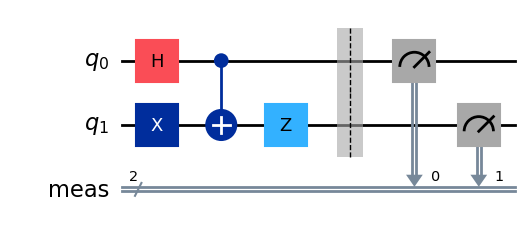

In [34]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

qc=QuantumCircuit(2)

qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.z(1)

state = Statevector.from_instruction(qc)

qc.measure_all()
qc.draw('mpl')

In [35]:
for i in range(4):
    binary = format(i, '02b')
    real = round(state.data[i].real, 3)
    imag = round(state.data[i].imag, 3)
    print(f"|{binary}⟩: {real} + {imag}j")

|00⟩: 0.0 + 0.0j
|01⟩: 0.707 + 0.0j
|10⟩: -0.707 + 0.0j
|11⟩: 0.0 + 0.0j


In [36]:

from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("Measurement Results:", counts)


Measurement Results: {'10': 2006, '01': 2090}


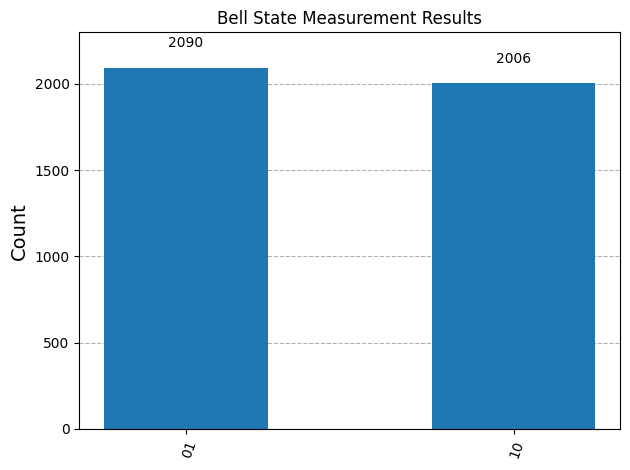

In [37]:
plot_histogram(counts, title="Bell State Measurement Results")